## Interactive Plotting of RoboLab Odometry data


In [5]:
from __future__ import print_function
%matplotlib ipympl
from typing import Tuple
import numpy as np

import math
from math import sin, cos

from os import listdir
from os.path import isfile, join
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt

### My (defenetly not optimal) impementation of the Odometry function
Only thing to change to get any odometry function, working in intervals of motor positionsto, to work, should be to change to numpy arrays, and if you update the coordinats append to numpy array and return them

In [6]:
#----------- Constants ----------------
a = 10
# MAGIC_VALUE = 0.9945 
VALUE = 1
rot = 0.04884


#----------- Odometry function ----------------

def get_diff_in_cm(ROT_TO_CM, magic_value, tu1:Tuple[int,int], tu2:Tuple[int,int]) -> Tuple[float, float]:
    return((tu1[0]-tu2[0]) * ROT_TO_CM * magic_value, (tu1[1]-tu2[1]) * ROT_TO_CM / magic_value)



# this is the odomety function of the rover, using nupy array for plotting

def update_position(drive_data, AXLE_LENGTH, ROT_TO_CM, MAGIC_VALUE,
                    local_x_coordinat = 0, local_y_coordinat = 0, local_oriantation:float = 0):
    list_of_coords = []
    list_np = np.zeros((len(drive_data), 2))
    alpha = 0
    for i in range(15, len(drive_data)-5):
        dl, dr = get_diff_in_cm(ROT_TO_CM,MAGIC_VALUE, drive_data[i+1], drive_data[i])

        if dl == dr:
            alpha = 0
            s = dl
        else:
            alpha = (dr - dl) / AXLE_LENGTH
            s = AXLE_LENGTH * (dr + dl) / (dr - dl) * math.sin((dr - dl) / (2 * AXLE_LENGTH))


        local_oriantation = local_oriantation + alpha
            # print(alpha)

        delta_x = s * (-1) * sin(local_oriantation)
        delta_y = s * cos(local_oriantation)


        local_x_coordinat += delta_x
        local_y_coordinat += delta_y

        list_of_coords.append((local_x_coordinat/50, local_y_coordinat/50))
        list_np[i] = [local_x_coordinat, local_y_coordinat]
    return np.array(list_of_coords)

### Plotting function
files should be saved in the format of pos_x-pos_y-oriantation (problem with negative values needs to be fixed some day) in folder specified in test_data_folder

interactive(children=(FloatSlider(value=10.3, description='A', max=20.0, min=5.0, readout_format='.1f'), Float…

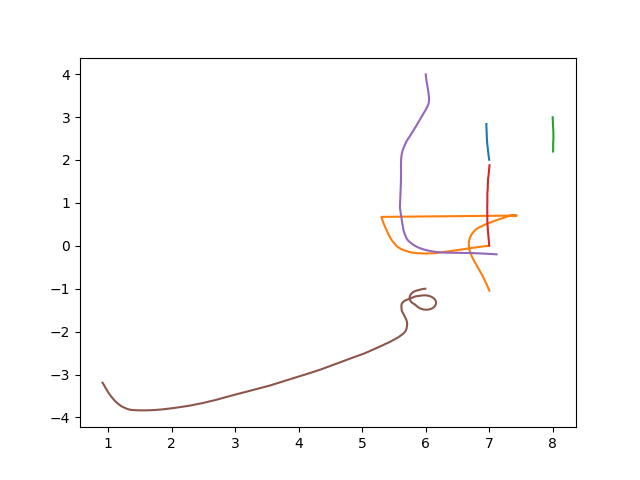

In [7]:
#-------------- Importing data --------------

#plotting all file in folder at the same time
#data needs to end i x.csv where x is the starting oriantation

test_data_folder = 'data/conway3/'
data_files = [f for f in listdir(test_data_folder) if isfile(join(test_data_folder, f))]
position_list = []
drive_data = []

#reading data from csv file
for file in data_files:
    position_list.append(file[:-4].split("+"))
    drive_data.append(np.genfromtxt(test_data_folder + file, delimiter=','))

directions = {"0":0, "270":-math.pi/2, "180":math.pi, "90":math.pi/2}
    
def plot_data_interactive(A, R, M, O):
    plt.cla()
    for i in range(len(drive_data)):
        data = update_position(drive_data[i],A, R, M,
                               local_x_coordinat=float(position_list[i][0])*50, 
                               local_y_coordinat=float(position_list[i][1])*50, 
                               local_oriantation=(360 - float(position_list[i][2])) / 180 * math.pi)



    #data = update_position(a, rot)
        plt.plot(data[:,0], data[:,1])

    plt.grid()
    plt.axis("scaled")
    #plt.xlim((-300,300))
    #plt.ylim((-300,300))
    plt.show()
    return()

interact(plot_data_interactive, 
         A=widgets.FloatSlider(min=5, max=20, step=0.1, value=10.3, readout_format='.1f'), 
         R=widgets.FloatSlider(min=0.04, max=0.06, step=0.001, value=0.05, readout_format='.3f'), 
         O=widgets.FloatSlider(min=0, max=math.pi*2, step=0.001, value=0, readout_format='.3f'), 
         M=widgets.FloatSlider(min=0.99, max=1.01, step=0.001, value=1, readout_format='.3f'));
